In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

col_names = ['price', 'area', 'bedrooms', 'bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking', 'prefarea', 'furnishingstatus']
pima = pd.read_csv("/content/Housing Price.csv", header=None, names=col_names)

In [ ]:
pima.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [ ]:
pima = pima.drop(0)

In [ ]:
pima.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in categorical_columns:
    if pima[col].dtype == 'object':
        pima[col] = enc.fit_transform(pima[col])

In [ ]:
pima['furnishingstatus'] = pima['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

In [ ]:
pima

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
2,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
3,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
4,12215000,NaN,4,2,2,1,0,1,0,1,3,1,2
5,11410000,NaN,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
542,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
543,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
544,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
pima2 = pima

imputer = SimpleImputer(strategy='mean')

pima2['area'] = imputer.fit_transform(pima2[['area']])

In [ ]:
pima2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420.000000,4,2,3,1,0,0,0,1,2,1,2
2,12250000,8960.000000,4,4,4,1,0,0,0,1,3,0,2
3,12250000,9960.000000,3,2,2,1,0,1,0,0,2,1,1
4,12215000,5087.304104,4,2,2,1,0,1,0,1,3,1,2
5,11410000,5087.304104,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,1820000,3000.000000,2,1,1,1,0,1,0,0,2,0,0
542,1767150,2400.000000,3,1,1,0,0,0,0,0,0,0,1
543,1750000,3620.000000,2,1,1,1,0,0,0,0,0,0,0
544,1750000,2910.000000,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
feature_cols = ['price', 'area', 'bedrooms', 'bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking', 'furnishingstatus']
X = pima[feature_cols]
y = pima.prefarea

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_reg = linear_reg.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression MSE: {mse}")


Linear Regression RMSE: 0.3645297163343475
Linear Regression MSE: 0.13288191409079986


In [ ]:
linear_reg.score(X_test, y_test)
print("The Training accuracy of the model is {:.2f}".format(linear_reg.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(linear_reg.score(X_test, y_test)))

The Training accuracy of the model is 0.19
The Testing accuracy of the model is 0.01


In [ ]:
predictions = linear_reg.predict(X_test)
print(predictions)

[ 0.16911695  0.41949602  0.4144803   0.16476946  0.34626471  0.17524384
  0.37826024  0.39178561  0.41049344  0.42160826 -0.32329027  0.5844608
  0.0956063   0.30799402  0.21735787  0.06349909  0.22180928  0.17921078
 -0.07480059  0.01314928  0.33662389  0.28547779 -0.06797792  0.3426589
  0.35000878  0.34237276  0.48932418  0.02483469  0.24811845  0.86973679
  0.28020972  0.42958336  0.25348059  0.17257617  0.43734824  0.17212861
  0.31603693  0.08050869  0.42383101  0.18503717  0.19654763  0.17595338
  0.2233301  -0.03515516  0.25601353  0.30050941  0.30421792  0.14158699
  0.24042706  0.27940255  0.27479331  0.12606721  0.07742722  0.29762254
  0.11492877  0.3979688   0.25452199  0.08799336  0.33374358  0.14538563
  0.26657868  0.39211674  0.39546212  0.10700357  0.27187599  0.02339151
  0.29965647  0.48620126  0.16563663 -0.03470644  0.28018241  0.31667834
 -0.02474116  0.23213567  0.00304237  0.44186247  0.07069225  0.60882933
  0.13530433  0.16514614  0.23171134  0.25227449  0.4

In [ ]:
print("The coefficients of the function are {}".format(linear_reg.coef_))
print("The intercept of the function is {}".format(linear_reg.intercept_))

The coefficients of the function are [ 9.59449231e-08  2.66322835e-06 -6.13155184e-04 -1.38076912e-01
 -5.49821245e-03  1.17390556e-01 -2.19127861e-02  1.77569834e-01
 -1.57026207e-01 -7.30300052e-02 -5.76575184e-03 -1.20524413e-02]
The intercept of the function is -0.13919186930700012


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.01420527843074193

In [ ]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,   0],
       [ 22,   0]])

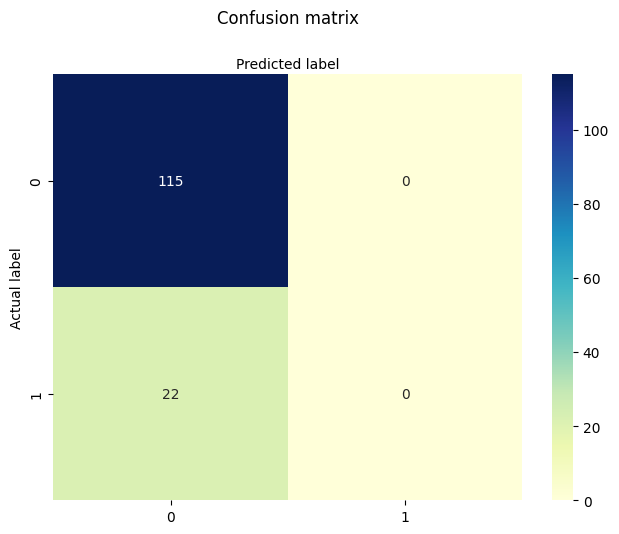

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['in preferable area', 'not in preferable area']
print(classification_report(y_test, y_pred, target_names=target_names))

                        precision    recall  f1-score   support

    in preferable area       0.84      1.00      0.91       115
not in preferable area       0.00      0.00      0.00        22

              accuracy                           0.84       137
             macro avg       0.42      0.50      0.46       137
          weighted avg       0.70      0.84      0.77       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


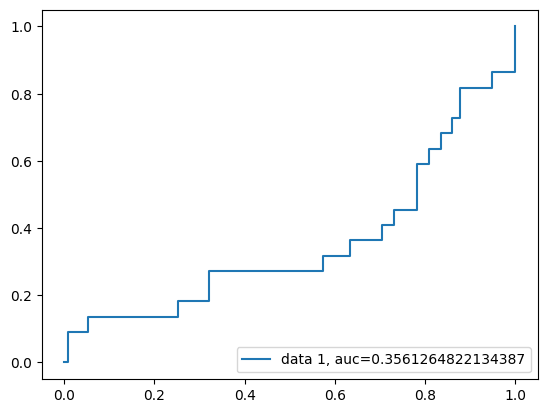

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()